## Rodrigo Geurgas Zavarizz - 9791080
## Victor Henrique de Souza Rodrigues - 9791027

In [165]:
import pandas as pd
import numpy as np

banks = pd.read_csv('bank.csv', sep=';', header=0, na_values='unknown')
banks

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,NaN,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,NaN,14,may,57,2,-1,0,NaN,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


1) Análise exploratória

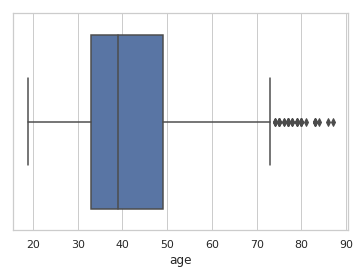

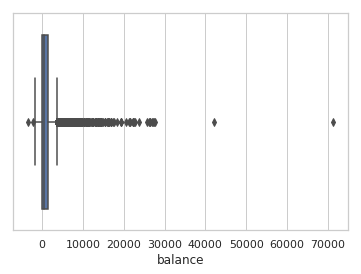

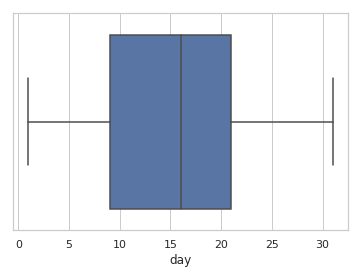

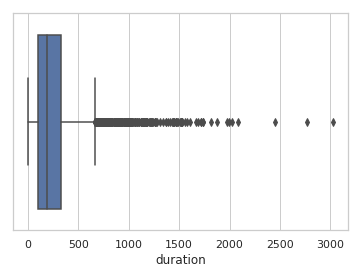

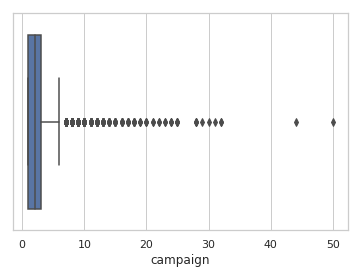

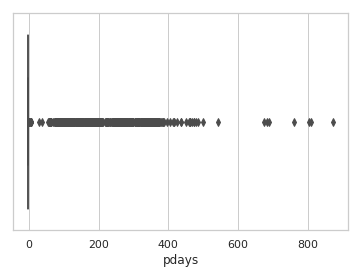

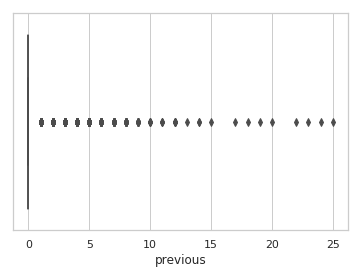

In [184]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='whitegrid')
sns.boxplot(banks.age, orient='h')
plt.show()
sns.boxplot(banks.balance, orient='h')
plt.show()
sns.boxplot(banks.day, orient='h')
plt.show()
sns.boxplot(banks.duration, orient='h')
plt.show()
sns.boxplot(banks.campaign, orient='h')
plt.show()
sns.boxplot(banks.pdays, orient='h')
plt.show()
sns.boxplot(banks.previous, orient='h')
plt.show()

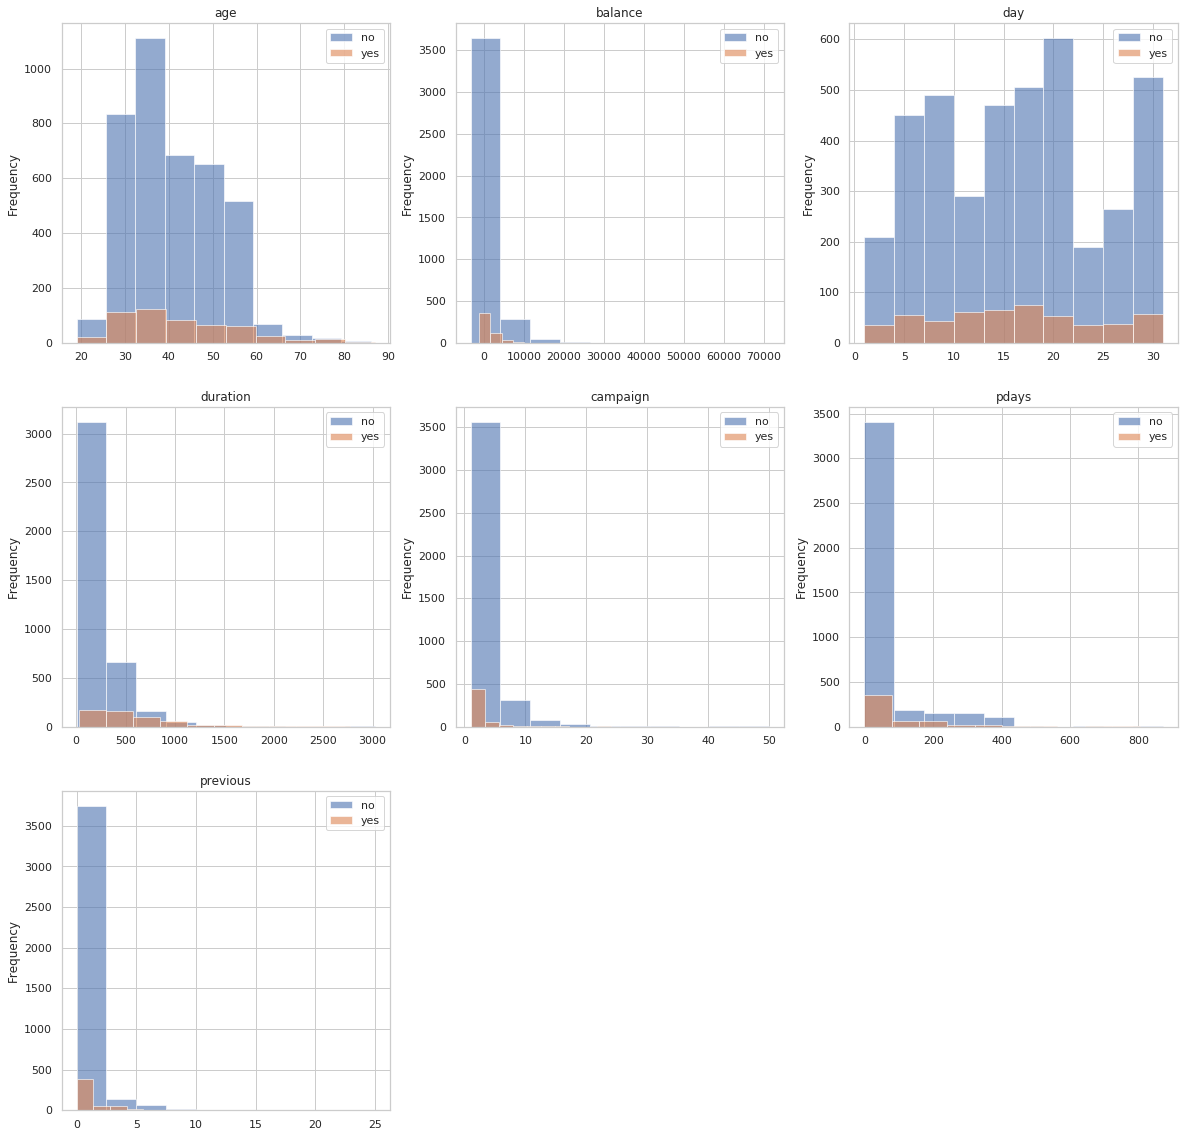

In [76]:
plt.figure(figsize=(20,20))
for i, col in enumerate(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']):
    ax = plt.subplot(3, 3, i+1)
    ax.set_title(col)
    for c in banks.y.unique():
        banks.loc[banks.y == c, col].plot.hist(alpha=0.6, label=c)
    ax.legend()
plt.show()

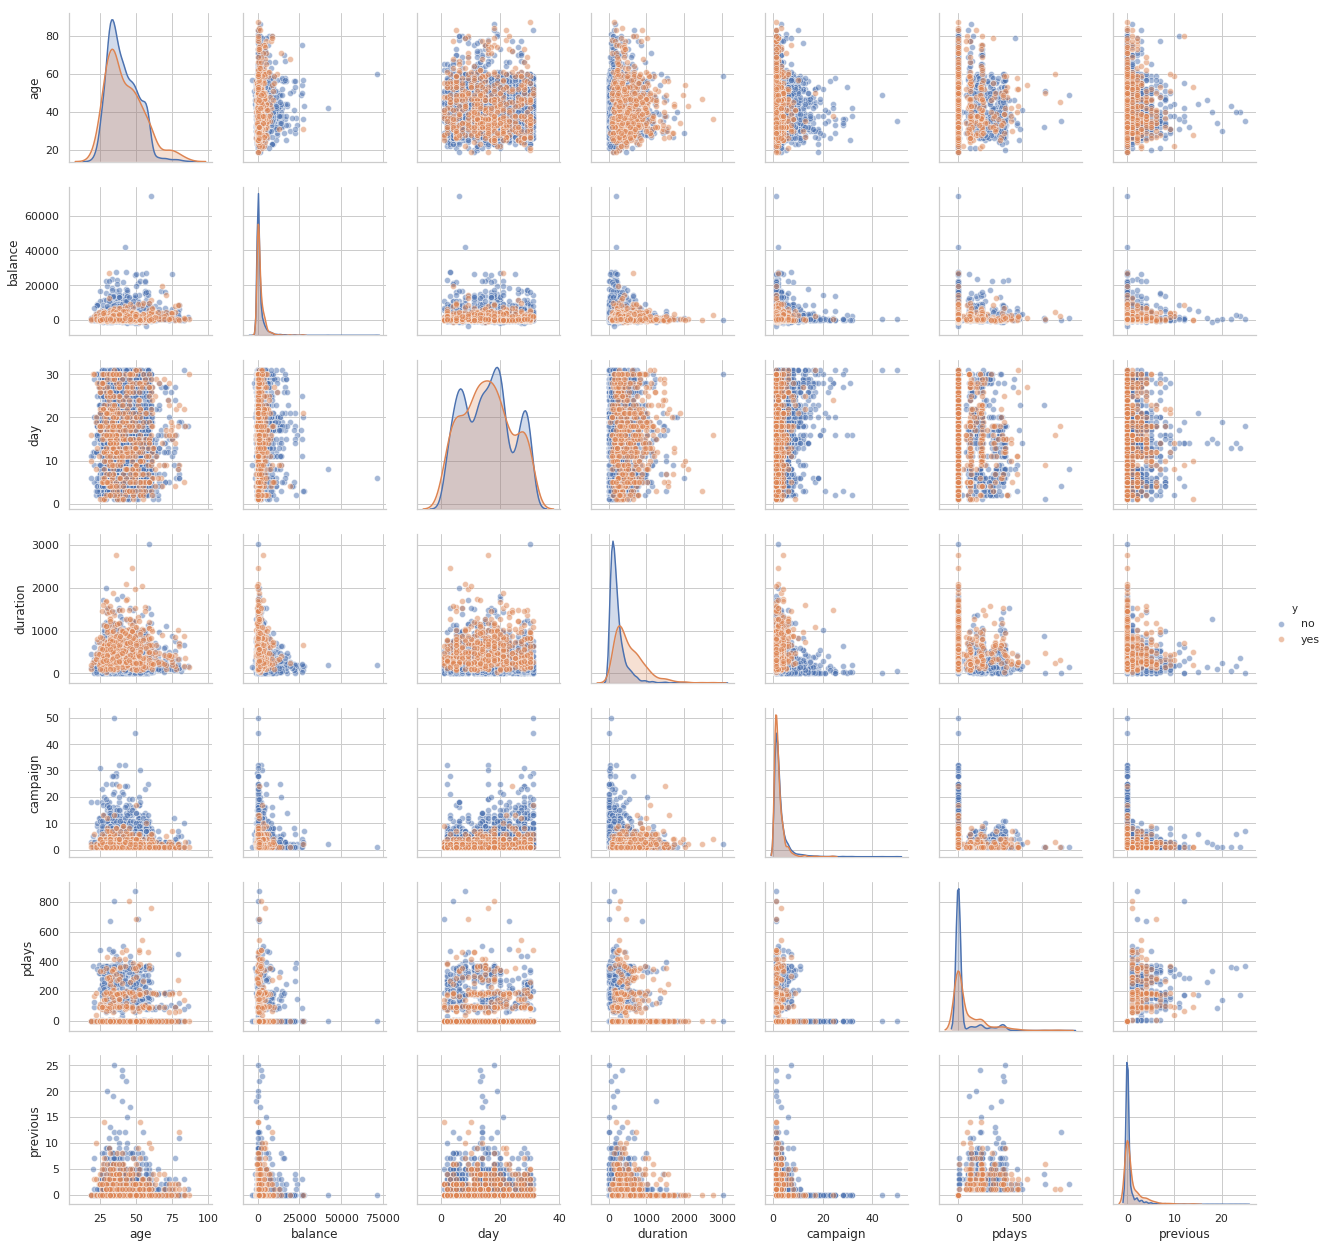

In [83]:
sns.pairplot(data=banks, vars=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], hue='y', plot_kws={'alpha': 0.5})
plt.show()

2) Perguntas sobre o conjunto de dados

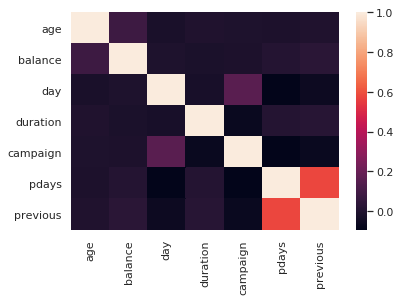

In [92]:
sns.heatmap(banks.corr('pearson'))
plt.show()

In [136]:
met = banks[(banks.marital == 'married') & (banks.education == 'tertiary')]
nmet = banks[(banks.marital != 'married') | (banks.education != 'tertiary')]
print(met)
print(nmet)

      age            job  marital education default  balance housing loan  \
3      30     management  married  tertiary      no     1476     yes  yes   
6      36  self-employed  married  tertiary      no      307     yes   no   
8      41   entrepreneur  married  tertiary      no      221     yes   no   
12     36     technician  married  tertiary      no     1109      no   no   
15     40     management  married  tertiary      no      194      no  yes   
24     26      housemaid  married  tertiary      no      543      no   no   
25     41     management  married  tertiary      no     5883      no   no   
34     49     technician  married  tertiary      no     1235      no   no   
43     32     technician  married  tertiary      no      396     yes   no   
53     34     technician  married  tertiary      no     1539     yes   no   
62     48     management  married  tertiary      no     5887      no   no   
70     37     management  married  tertiary      no        0      no   no   

In [140]:
print(f'Ser casado e com diploma universitário: {len(met[met.y == "yes"])/len(met)*100:.2f}%')
print(f'Não ser casado ou não ter diploma universitário: {len(nmet[nmet.y == "yes"])/len(nmet)*100:.2f}%')

Ser casado e com diploma universitário: 13.07%
Não ser casado ou não ter diploma universitário: 11.23%


In [142]:
ca = met[met.y == 'no']
print(f'{len(ca[ca.default == "no"])/len(ca[ca.default == "yes"])}')

125.4


    2.1) A partir das informações que podemos retirar dos gráficos não há outliers nos atributos age, balance, day e previous sendo que os extremos se dão apenas por valores longe da mediana. Em contrapartida os atributos duration, campaign e pdays apresentam outliers, pois os valores estão altos demais e no contexto apresentados não fazem sentido.
    2.2) pdays e previous.
    2.3) Considerando as informações do scatterplot a correlação não parece verossímil, pois no mesmo os atributos estão muito dispersos e não aparentam ter correlação.
    2.4) Como pode ser observado a porcentagem de pessoas casadas e com diploma universitário que assinaram um termo de depósito é maior do que a de não casados ou não tem diploma universitário que assinaram, portanto da para se afirmar que as chances aumentam.
    2.5) Há 125 vezes mais pessoas dentre os casados, com diploma universitário e que não assinaram um termo de depósito que não deixaram de pagar um crédito anterior do que deixaram.

3) Selecionaríamos age, default, balance, housing, loan, campaign. Escolhemos age, pois dependendo da idade a pessoa é mais propícia a pegar empréstimos para começar sua vida, default, porque uma pessoa que já pegou empréstimo pode pegar de novo, balance, housing e loan, para saber o estatus financeiro da pessoa, e campaign para saber se a pessoa está engajada com a campanha.

4) Tratar desbalanceamento

In [157]:
distribution = banks.iloc[:, [0,-1]].groupby('y').count()
print(distribution)

      age
y        
no   4000
yes   521


In [155]:
sub_sampled = [banks.loc[banks.y == c, :].sample(n=521, replace=True) for c in banks.y.unique()]
sub_sampled = pd.concat(sub_sampled)
sub_sampled.reset_index(inplace=True, drop=True)
sub_sampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,admin.,married,tertiary,no,1287,no,no,NaN,16,jun,286,1,-1,0,NaN,no
1,39,management,divorced,tertiary,no,1315,yes,no,cellular,19,nov,1337,4,126,1,failure,no
2,36,management,single,tertiary,no,260,yes,no,cellular,7,may,49,1,-1,0,NaN,no
3,57,housemaid,single,secondary,no,254,no,no,cellular,8,oct,676,1,-1,0,NaN,no
4,35,entrepreneur,married,tertiary,no,2723,yes,yes,cellular,8,aug,275,4,-1,0,NaN,no
5,40,entrepreneur,married,secondary,no,1532,yes,yes,cellular,18,nov,173,7,-1,0,NaN,no
6,51,entrepreneur,divorced,tertiary,no,4,yes,yes,cellular,20,apr,74,5,-1,0,NaN,no
7,40,management,married,tertiary,no,89,yes,yes,telephone,9,feb,148,6,-1,0,NaN,no
8,56,admin.,divorced,NaN,no,789,yes,no,cellular,8,may,1022,1,360,2,failure,no
9,40,services,divorced,secondary,no,1959,yes,no,NaN,30,may,177,1,-1,0,NaN,no


In [158]:
distribution = sub_sampled.iloc[:, [0,-1]].groupby('y').count()
print(distribution)

     age
y       
no   521
yes  521


    4.2) Escolhemos fazer o subamostragem dos dados, pois como podemos observar há uma discrepância muito grande entre o número de elementos das duas classes (521 para 4000) e se fizéssemos o superamostragem ficaríamos com diversos dados duplicados.

5) Normalização

In [159]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

In [175]:
scaler = MinMaxScaler()
banks_normalized = pd.DataFrame(scaler.fit_transform(banks.loc[:, ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]), columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])
banks_normalized

,age,balance,day,duration,campaign,pdays,previous
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00
5,0.235294,0.054496,0.733333,0.045349,0.020408,0.202982,0.12
6,0.250000,0.048590,0.433333,0.111552,0.000000,0.379587,0.08
7,0.294118,0.046442,0.166667,0.048659,0.020408,0.000000,0.00
8,0.323529,0.047436,0.433333,0.017544,0.020408,0.000000,0.00
9,0.352941,0.043288,0.533333,0.102284,0.000000,0.169725,0.08


In [178]:
banks_zscore = pd.DataFrame(zscore(banks.loc[:, ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]), columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']).join(
    banks.y)
banks_zscore

,age,balance,day,duration,campaign,pdays,previous,y
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,no
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,no
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,no
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,no
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,no
5,-0.583458,-0.224523,0.859091,-0.473241,-0.255231,1.360836,1.451197,no
6,-0.488896,-0.370736,-0.232247,0.296499,-0.576829,2.899143,0.860660,no
7,-0.205209,-0.423904,-1.202326,-0.434754,-0.255231,-0.407218,-0.320413,no
8,-0.016085,-0.399314,-0.232247,-0.796532,-0.255231,-0.407218,-0.320413,no
9,0.173040,-0.501996,0.131532,0.188735,-0.576829,1.071155,0.860660,no


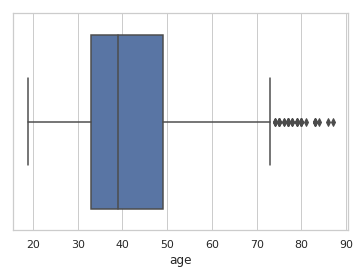

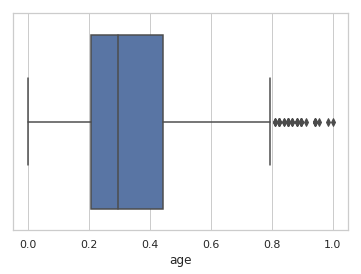

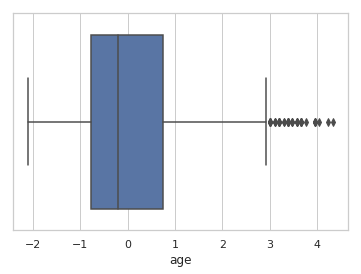

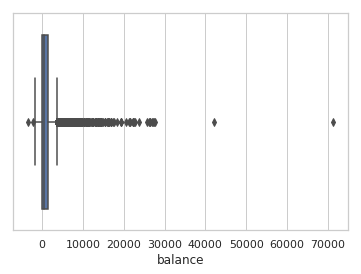

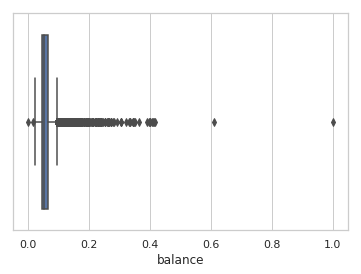

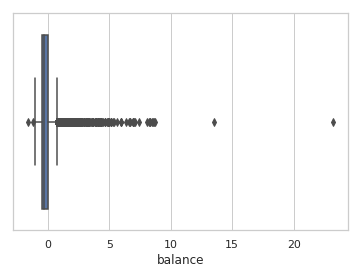

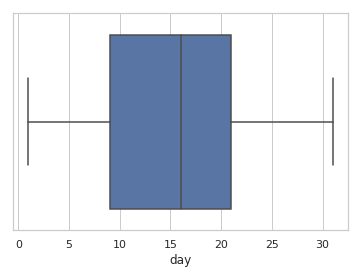

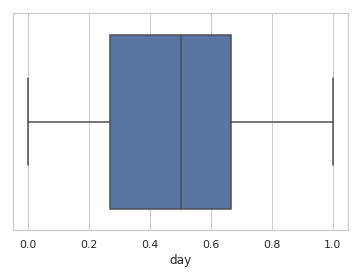

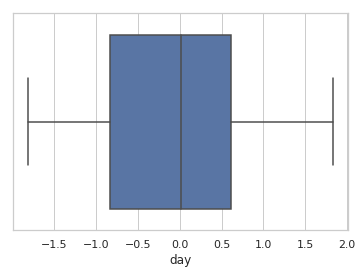

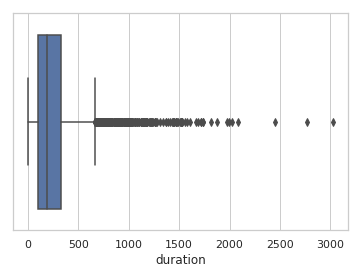

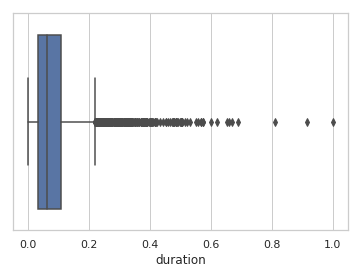

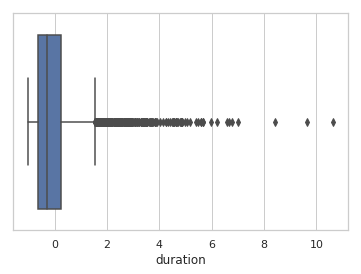

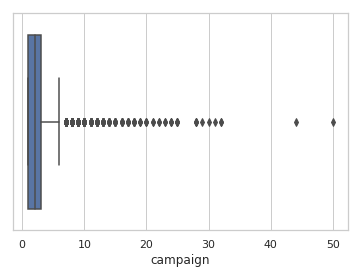

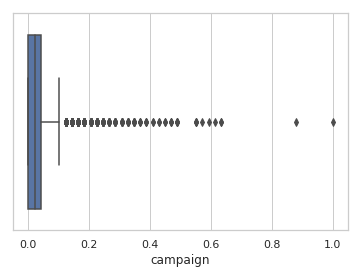

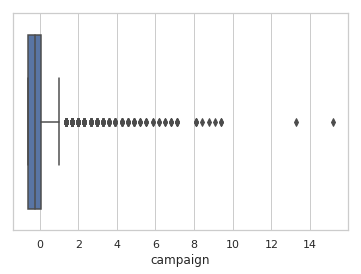

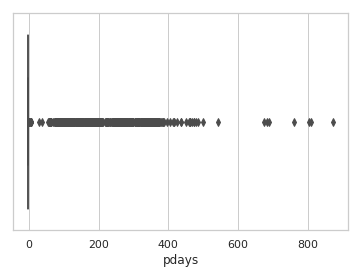

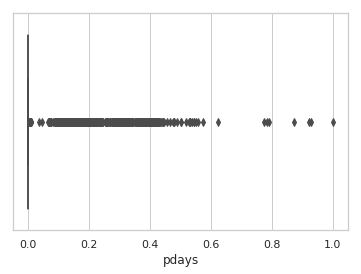

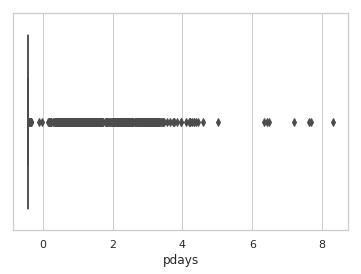

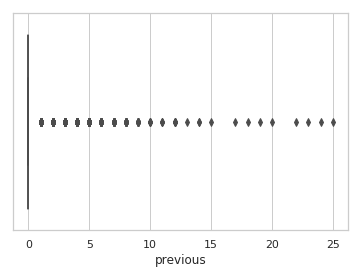

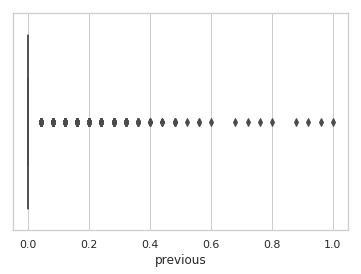

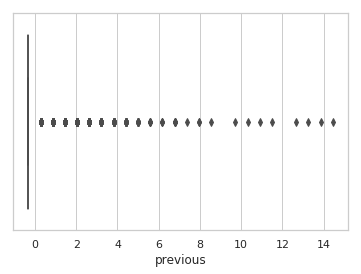

In [189]:
print('A ordem é antes da normalização, normlização 1 0 e normalização zsscore')

sns.boxplot(banks.age, orient='h')
plt.show()
sns.boxplot(banks_normalized.age, orient='h')
plt.show()
sns.boxplot(banks_zscore.age, orient='h')
plt.show()
sns.boxplot(banks.balance, orient='h')
plt.show()
sns.boxplot(banks_normalized.balance, orient='h')
plt.show()
sns.boxplot(banks_zscore.balance, orient='h')
plt.show()
sns.boxplot(banks.day, orient='h')
plt.show()
sns.boxplot(banks_normalized.day, orient='h')
plt.show()
sns.boxplot(banks_zscore.day, orient='h')
plt.show()
sns.boxplot(banks.duration, orient='h')
plt.show()
sns.boxplot(banks_normalized.duration, orient='h')
plt.show()
sns.boxplot(banks_zscore.duration, orient='h')
plt.show()
sns.boxplot(banks.campaign, orient='h')
plt.show()
sns.boxplot(banks_normalized.campaign, orient='h')
plt.show()
sns.boxplot(banks_zscore.campaign, orient='h')
plt.show()
sns.boxplot(banks.pdays, orient='h')
plt.show()
sns.boxplot(banks_normalized.pdays, orient='h')
plt.show()
sns.boxplot(banks_zscore.pdays, orient='h')
plt.show()
sns.boxplot(banks.previous, orient='h')
plt.show()
sns.boxplot(banks_normalized.previous, orient='h')
plt.show()
sns.boxplot(banks_zscore.previous, orient='h')
plt.show()